In [9]:
pip install ta


In [10]:
import pandas as pd
import ta




<ipython-input-11-ea741a59d358>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


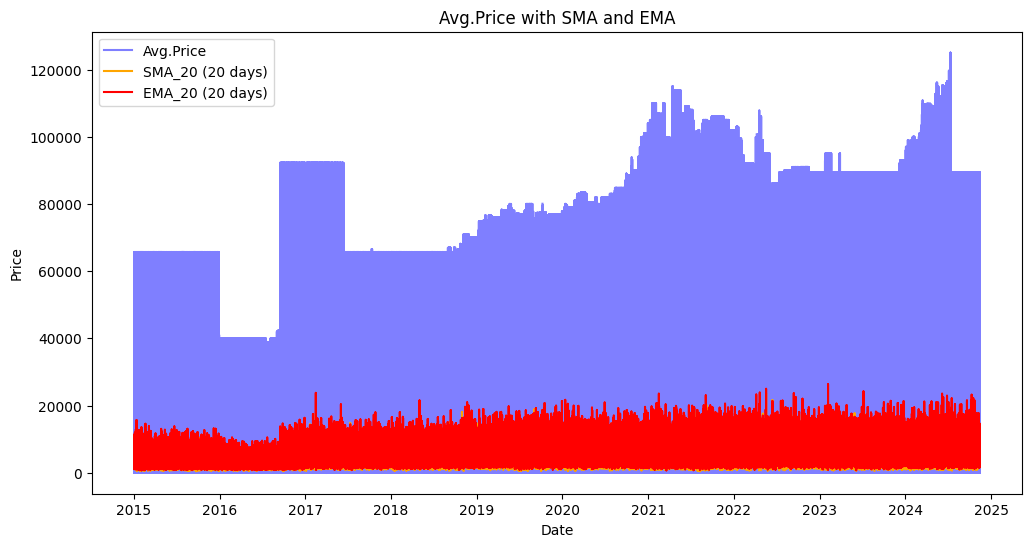

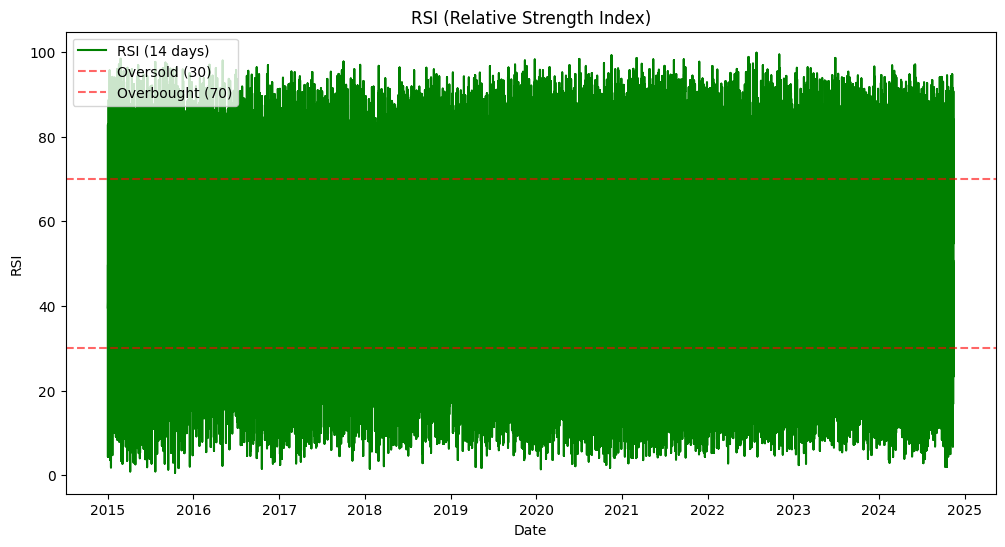

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'issuer_data (5).csv'
data = pd.read_csv(file_path)

# Convert Avg.Price to numeric and Date to datetime
data['Avg.Price'] = data['Avg.Price'].str.replace(',', '').astype(float)
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Sort the data by Date
data = data.sort_values('Date').reset_index(drop=True)

# Calculate SMA (Simple Moving Average)
data['SMA_20'] = data['Avg.Price'].rolling(window=20).mean()
data['SMA_50'] = data['Avg.Price'].rolling(window=50).mean()

# Calculate EMA (Exponential Moving Average)
data['EMA_20'] = data['Avg.Price'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Avg.Price'].ewm(span=50, adjust=False).mean()

# Function to calculate RSI
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI (Relative Strength Index)
data['RSI'] = calculate_rsi(data['Avg.Price'], window=14)

# Plot Avg.Price with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Avg.Price'], label='Avg.Price', color='blue', alpha=0.5)
plt.plot(data['Date'], data['SMA_20'], label='SMA_20 (20 days)', color='orange')
plt.plot(data['Date'], data['EMA_20'], label='EMA_20 (20 days)', color='red')
plt.title('Avg.Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['RSI'], label='RSI (14 days)', color='green')
plt.axhline(30, linestyle='--', color='red', alpha=0.6, label='Oversold (30)')
plt.axhline(70, linestyle='--', color='red', alpha=0.6, label='Overbought (70)')
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
